-----------------------------------------------
# 2020 05 14 Thursday

# Logistic Regression (MNIST)
#### MNIST: 사람이 손 글씨를 쓴 데이터
### (preliminary: logistic model)
## 1. Library, Data, Preprocessing (Split, Normalize)
## 2. Solve logistic model with Pytorch
## 3. Show the result with confusion matrix

# Library

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("device: gpu") if torch.cuda.is_available() else print("device: cpu")
#가능하면 gpu쓰고, 가능하지 않다면 cpu를 써라

device: gpu


# Hyper parameter setting

In [2]:
# hypter parameter setting
learning_rate = 1e-1 # 0.1
epochs = 50
batch_size = 60000 # gradient descent
display_step = 10 #10 step마다 데이터를 보겠다.

# Load data

len(train_data):  60000
len(test_data):  10000
data shape:  torch.Size([1, 28, 28])
label:  5


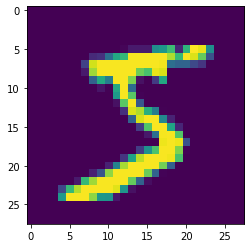

In [3]:
# load data (MNIST불러오기)
train_data = dataset.MNIST("./", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
test_data = dataset.MNIST("./", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)

# check the data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

x_train, y_train = train_data[0]
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train[0])
plt.show()

## Pre-process

data shape: torch.Size([60000, 1, 28, 28])
label: tensor([1, 2, 2,  ..., 7, 5, 5])


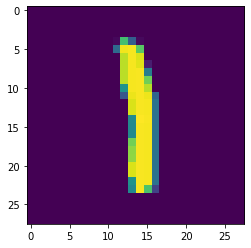

In [4]:
# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 10000, shuffle = True, num_workers = 1, drop_last = True)

# check the data 
examples = enumerate(train_loader) #순서와 같이 저장
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape)
print('label:', example_target)

plt.figure()
plt.imshow(example_data[0][0])
plt.show()

# Make model with pytorch (Gradient Descent)

In [5]:
# model
model = nn.Linear(28*28,10)
model = model.to(device)
model.train()

# loss and optimizer 
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss_array = []

# train the model
for epoch in range(epochs):
    for iteration, [data, label] in enumerate(train_loader):
        optimizer.zero_grad()
        
        x = data.to(device)
        x = x.view(batch_size, -1) #reshape와 동일
        y = label.to(device)
        
        output = model(x)

        loss = loss_function(output, y)
        loss.backward()
        optimizer.step()
            
        loss_array.append(loss.cpu().detach().numpy())
    
    if epoch % 10 == 0:
        print("Epoch:", epoch + 1, "\Loss:", loss)

Epoch: 1 \Loss: tensor(2.3481, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 11 \Loss: tensor(1.5672, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 21 \Loss: tensor(1.1990, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 31 \Loss: tensor(1.0021, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 41 \Loss: tensor(0.8820, device='cuda:0', grad_fn=<NllLossBackward>)


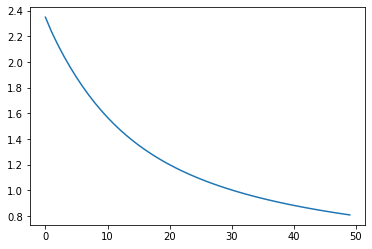

In [6]:
plt.figure()
plt.plot(loss_array)
plt.show()

# Test

In [7]:
# test
model.eval()
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 10000, shuffle = True, num_workers = 1, drop_last = True)
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad(): #gradient가 필요없어서 메모리 효율을 위해 no 표시
    for data, label in test_loader:
        x = data.to(device)
        x = x.view(-1, 28*28)
        y = label.to(device)
        
        prediction = model(x)
        _, prediction_index = torch.max(prediction, 1)
                
        prediction_list.append(prediction_index)
        label_list.append(y)
        
        total += y.size(0)
        correct += (prediction_index == y).sum().float()
        
print('total', total)
print('correct', correct)
print('accuracy', correct/total)

total 10000
correct tensor(8454., device='cuda:0')
accuracy tensor(0.8454, device='cuda:0')


# Confusion matrix

In [10]:
# confusion matrix 각각의 클래스 마다 몇개를 맞추는지 제공
from sklearn.metrics import confusion_matrix
import numpy as np
    
prediction_array = np.array(prediction_list[0].cpu())
label_array = np.array(label_list[0].cpu())

print("prediction :", prediction_array.shape)
print("true label :", label_array.shape)

confusion_matrix(
    label_array,
    prediction_array) # y_pred
#0일때 0이라고 예측한게 938, 1이라고 예측한게 0 2라고 예측한게 3
#1일때 0이라고 예측한게 0, 1이라고 예측한게 1080, 2라고 예측한게 8

prediction : (10000,)
true label : (10000,)


array([[ 938,    0,    3,    7,    0,    2,   20,    1,    9,    0],
       [   0, 1080,    8,    4,    1,    1,    4,    0,   37,    0],
       [  16,   35,  829,   30,   18,    0,   29,   22,   47,    6],
       [   6,    4,   22,  872,    1,   24,    8,   21,   35,   17],
       [   3,   11,    4,    0,  846,    0,   21,    2,   14,   81],
       [  35,   24,   10,  133,   22,  544,   36,   16,   51,   21],
       [  24,    6,   23,    2,   11,   16,  867,    0,    9,    0],
       [   5,   45,   24,    1,   13,    0,    3,  884,   12,   41],
       [  10,   23,   15,   63,    9,   16,   18,   15,  770,   35],
       [  17,   16,   11,   13,   62,    8,    3,   39,   16,  824]],
      dtype=int64)